# ECE239AS Project

#### Load the dataset

In [1]:
from useful.utils import *
from useful.CNN_RNN_v3 import *
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

/Users/shuangyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)


# CNN+ GRU

In [2]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=val_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target).long()
        output = model(data)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

def main_train(epoches = 10):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    stats['test']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))       
        stats['test'].append(test(test_loader, mode = 'val'))

    

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])
    stats['test'] = np.array(stats['test'])
    print("Best test acc is :")
    print(np.amax(stats['test'][:,1]))

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

### subject 1

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/187 (0%)]	Loss: 1.346836
Train Epoch: 0 [100/187 (50%)]	Loss: 1.374713
train loss: 1.3886, Accuracy: 47/187 (25%)
validation loss: 1.3867, Accuracy: 13/50 (26%)

validation loss: 1.3883, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.397128
Train Epoch: 1 [100/187 (50%)]	Loss: 1.379615
train loss: 1.3865, Accuracy: 47/187 (25%)
validation loss: 1.3863, Accuracy: 13/50 (26%)

validation loss: 1.3868, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.388964
Train Epoch: 2 [100/187 (50%)]	Loss: 1.402534
train loss: 1.3848, Accuracy: 47/187 (25%)
validation loss: 1.3859, Accuracy: 13/50 (26%)

validation loss: 1.3867, Accuracy: 12/50 (24%)

Train Epoch: 3 [0/187 (0%)]	Loss: 1.371205
Tr

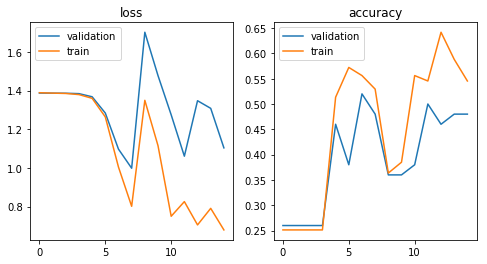

In [3]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 2

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.434709
Train Epoch: 0 [100/186 (50%)]	Loss: 1.392780
train loss: 1.3882, Accuracy: 47/186 (25%)
validation loss: 1.3882, Accuracy: 13/50 (26%)

validation loss: 1.3907, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.370266
Train Epoch: 1 [100/186 (50%)]	Loss: 1.410876
train loss: 1.3866, Accuracy: 46/186 (25%)
validation loss: 1.3880, Accuracy: 12/50 (24%)

validation loss: 1.3877, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.380305
Train Epoch: 2 [100/186 (50%)]	Loss: 1.359529
train loss: 1.3859, Accuracy: 47/186 (25%)
validation loss: 1.3880, Accuracy: 12/50 (24%)

validation loss: 1.3858, Accuracy: 13/50 (26%)

Train E

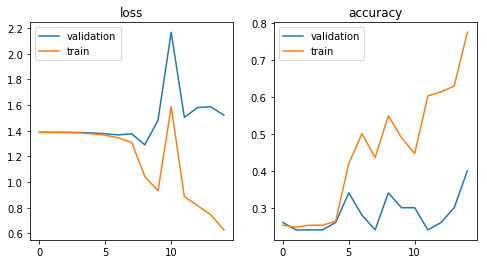

In [4]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A02T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 3

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.397313
Train Epoch: 0 [100/186 (50%)]	Loss: 1.384986
train loss: 1.3866, Accuracy: 47/186 (25%)
validation loss: 1.3864, Accuracy: 12/50 (24%)

validation loss: 1.3857, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.382810
Train Epoch: 1 [100/186 (50%)]	Loss: 1.378863
train loss: 1.3850, Accuracy: 48/186 (26%)
validation loss: 1.3871, Accuracy: 11/50 (22%)

validation loss: 1.3852, Accuracy: 14/50 (28%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.376858
Train Epoch: 2 [100/186 (50%)]	Loss: 1.396285
train loss: 1.3829, Accuracy: 54/186 (29%)
validation loss: 1.3862, Accuracy: 14/50 (28%)

validation loss: 1.3846, Accuracy: 13/50 (26%)

Train E

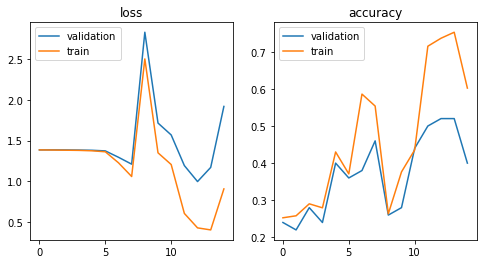

In [5]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A03T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject4

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
Train data shape:  (184, 22, 1000)
Train labels shape:  (184,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/184 (0%)]	Loss: 1.378439
Train Epoch: 0 [100/184 (50%)]	Loss: 1.380129
train loss: 1.3876, Accuracy: 46/184 (25%)
validation loss: 1.3888, Accuracy: 12/50 (24%)

validation loss: 1.3893, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/184 (0%)]	Loss: 1.374878
Train Epoch: 1 [100/184 (50%)]	Loss: 1.376985
train loss: 1.3864, Accuracy: 46/184 (25%)
validation loss: 1.3870, Accuracy: 12/50 (24%)

validation loss: 1.3867, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/184 (0%)]	Loss: 1.399320
Train Epoch: 2 [100/184 (50%)]	Loss: 1.407791
train loss: 1.3861, Accuracy: 46/184 (25%)
validation loss: 1.3866, Accu

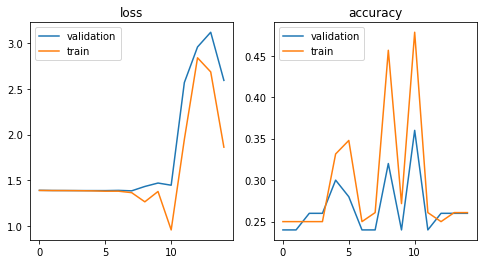

In [6]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A04T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject5

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.400979
Train Epoch: 0 [100/182 (50%)]	Loss: 1.373746
train loss: 1.3865, Accuracy: 46/182 (25%)
validation loss: 1.3864, Accuracy: 13/50 (26%)

validation loss: 1.3857, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.394962
Train Epoch: 1 [100/182 (50%)]	Loss: 1.382637
train loss: 1.3844, Accuracy: 49/182 (27%)
validation loss: 1.3861, Accuracy: 12/50 (24%)

validation loss: 1.3856, Accuracy: 14/50 (28%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.363224
Train Epoch: 2 [100/182 (50%)]	Loss: 1.386651
tr

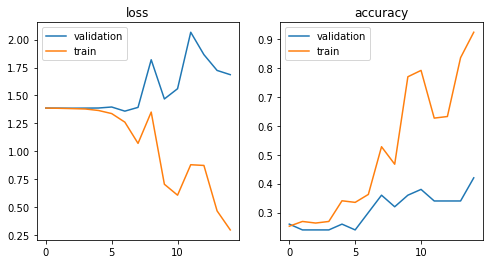

In [7]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A05T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 6

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
Train data shape:  (185, 22, 1000)
Train labels shape:  (185,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/185 (0%)]	Loss: 1.362739
Train Epoch: 0 [100/185 (50%)]	Loss: 1.420155
train loss: 1.3874, Accuracy: 47/185 (25%)
validation loss: 1.3895, Accuracy: 12/50 (24%)

validation loss: 1.3895, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/185 (0%)]	Loss: 1.406706
Train Epoch: 1 [100/185 (50%)]	Loss: 1.380603
train loss: 1.3870, Accuracy: 47/185 (25%)
validation loss: 1.3889, Accuracy: 12/50 (24%)

validation loss: 1.3889, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/185 (0%)]	Loss: 1.389125
Train Epoch: 2 [100/185 (50%)]	Loss: 1.382589
train loss: 1.3865, Accuracy: 47/185 (25%)
validation loss: 1.3887, Accuracy: 12/50 (24%)

validation loss: 1.

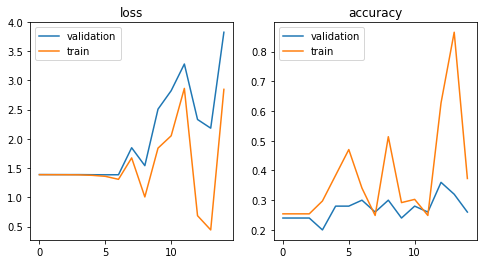

In [8]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A06T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 7

X_shape (288, 22, 1000)
y_shape (1, 1000)
Train data shape:  (188, 22, 1000)
Train labels shape:  (188,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/188 (0%)]	Loss: 1.437120
Train Epoch: 0 [100/188 (50%)]	Loss: 1.400293
train loss: 1.3876, Accuracy: 47/188 (25%)
validation loss: 1.3858, Accuracy: 13/50 (26%)

validation loss: 1.3894, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/188 (0%)]	Loss: 1.370737
Train Epoch: 1 [100/188 (50%)]	Loss: 1.375428
train loss: 1.3806, Accuracy: 47/188 (25%)
validation loss: 1.3819, Accuracy: 13/50 (26%)

validation loss: 1.3862, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/188 (0%)]	Loss: 1.376137
Train Epoch: 2 [100/188 (50%)]	Loss: 1.344386
train loss: 1.3423, Accuracy: 86/188 (46%)
validation loss: 1.3618, Accuracy: 19/50 (38%)

validation loss: 1.3655, Accuracy: 20/50 (40%)

Train Epoch: 3 [0/188 (0%)]	Loss: 1.337000
Train Epoch: 3 [100/188 (50%)]	Loss: 1

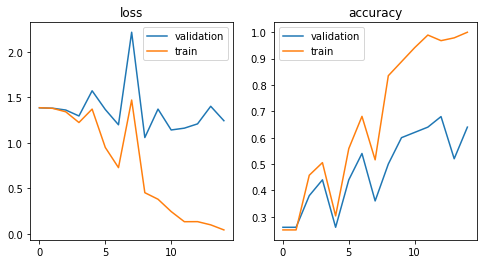

In [9]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A07T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 8

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.384145
Train Epoch: 0 [100/182 (50%)]	Loss: 1.373242
train loss: 1.3869, Accuracy: 46/182 (25%)
validation loss: 1.3871, Accuracy: 13/50 (26%)

validation loss: 1.3886, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.384688
Train Epoch: 1 [100/182 (50%)]	Loss: 1.365072
train loss: 1.3830, Accuracy: 48/182 (26%)
validation loss: 1.3836, Accuracy: 13/50 (26%)

validation loss: 1.3862, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.349443
Train Epoch: 2 [100/182 (50%)]	Loss: 1.320872


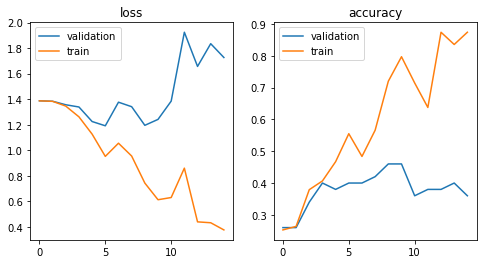

In [10]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A08T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 09

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 22,and be deleted
nan exists on row 61,and be deleted
nan exists on row 92,and be deleted
nan exists on row 93,and be deleted
nan exists on row 159,and be deleted
nan exists on row 202,and be deleted
nan exists on row 204,and be deleted
nan exists on row 218,and be deleted
nan exists on row 239,and be deleted
nan exists on row 250,and be deleted
Train data shape:  (178, 22, 1000)
Train labels shape:  (178,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/178 (0%)]	Loss: 1.387453
Train Epoch: 0 [100/178 (56%)]	Loss: 1.410576
train loss: 1.3887, Accuracy: 44/178 (25%)
validation loss: 1.3858, Accuracy: 13/50 (26%)

validation loss: 1.3893, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/178 (0%)]	Loss: 1.387615
Train Epoch: 1 [100/178 (56%)]	Loss: 1.343800
train loss: 1.3358, Accuracy: 55/178 (31%)
validation loss: 1.3428, Accuracy: 13/5

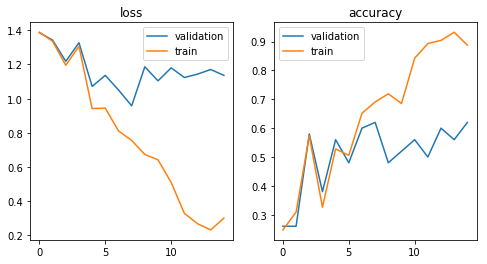

In [11]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A09T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_GRU()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### wholeset

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 8 [1500/1838 (81%)]	Loss: 1.060999
Train Epoch: 8 [1650/1838 (89%)]	Loss: 1.131558
Train Epoch: 8 [1800/1838 (97%)]	Loss: 1.229072
train loss: 0.9429, Accuracy: 1084/1838 (59%)
validation loss: 1.3231, Accuracy: 110/270 (41%)

validation loss: 1.2725, Accuracy: 197/450 (44%)

Train Epoch: 9 [0/1838 (0%)]	Loss: 0.859175
Train Epoch: 9 [150/1838 (8%)]	Loss: 1.228860
Train Epoch: 9 [300/1838 (16%)]	Loss: 0.982201
Train Epoch: 9 [450/1838 (24%)]	Loss: 1.199011
Train Epoch: 9 [600/1838 (32%)]	Loss: 1.102389
Train Epoch: 9 [750/1838 (40%)]	Loss: 0.933030
Train Epoch: 9 [900/1838 (48%)]	Loss: 0.970163
Train Epoch: 9 [1050/1838 (56%)]	Loss: 1.050740
Train Epoch: 9 [1200/1838 (65%)]	Loss: 1.046898
Train Epoch: 9 [1350/1838 (73%)]	Loss: 0.794565
Train Epoch: 9 [1500/1838 (81%)]	Loss: 1.049575
Train Epoch: 9 [1650/1838 (89%)]	Loss: 0.984412
Train Epoch: 9 [1800/1838 (97%)]	Loss: 1.011536
train loss: 0.8265, Accuracy: 1213/1838 (66%)
validation loss: 1.1922, Accuracy: 132/270 (49%)

v

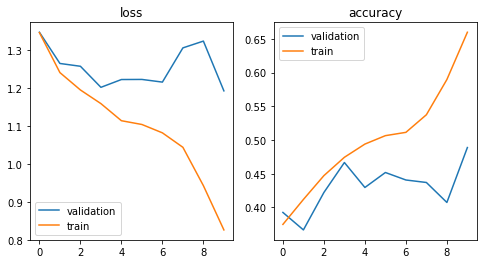

In [3]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_GRU()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')

In [ ]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_GRU()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')a